<a href="https://colab.research.google.com/github/miczkejedrzej/MNLP-project-1/blob/main/Project_Thomas_Garnier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving [MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv to [MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
train_df = pd.read_csv('[MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv', sep='\t')
train_df.head(5)

,item,name,description,type,category,subcategory,label
0,http://www.wikidata.org/entity/Q306,Sebastián Piñera,Chilean entrepreneur and politician (1949–2024),entity,politics,politician,cultural exclusive
1,http://www.wikidata.org/entity/Q12735,John Amos Comenius,"Czech teacher, educator, philosopher and write...",entity,politics,politician,cultural representative
2,http://www.wikidata.org/entity/Q1752,Macrinus,Roman emperor from 217 to 218,entity,politics,politician,cultural representative
3,http://www.wikidata.org/entity/Q1639,Lamine Diack,Senegalese sports manager (1933–2021),entity,politics,politician,cultural representative
4,http://www.wikidata.org/entity/Q9588,Richard Nixon,President of the United States from 1969 to 1974,entity,politics,politician,cultural representative


In [4]:
train_df.shape

(6251, 7)

In [102]:
train_df.dtypes

,0
item,object
name,object
description,object
type,object
category,object
subcategory,object
label,object


In [100]:
train_df.describe()
# top : the most frequent value
# freq : the frequence of the most frequent value
# Is there any duplicate ?

,item,name,description,type,category,subcategory,label
count,6251,6251,6251,6251,6251,6251,6244
unique,6251,6245,5672,2,19,108,9
top,http://www.wikidata.org/entity/Q67094,Alexandria,film genre,entity,politics,politician,cultural exclusive
freq,1,2,32,3924,532,99,2685


In [104]:
train_df[train_df['name'] == 'Alexandria']

# No duplicates

,item,name,description,type,category,subcategory,label
6081,http://www.wikidata.org/entity/Q88,Alexandria,"city in the state of Virginia, United States",entity,geography,city,cultural exclusive
6089,http://www.wikidata.org/entity/Q87,Alexandria,city in Egypt,entity,geography,city,cultural exclusive


In [5]:
def group_and_count(df, var):
  """
  Get a variable from the data set, and returns the number of items for each of this variable
  """
  print('Variable to group and count :', var, '\n', df.groupby(by=var, axis=0).count()['item'], '\n')


var_to_group_and_count=['type', 'category', 'subcategory', 'label']

for var in var_to_group_and_count:
  group_and_count(df=train_df, var=var)

Variable to group and count : type 
 type
concept    2327
entity     3924
Name: item, dtype: int64 

Variable to group and count : category 
 category
architecture               396
biology                    286
books                      192
comics and anime           312
fashion                    319
films                      269
food                       346
geography                  411
gestures and habits        259
history                    304
literature                 363
media                      285
music                      348
performing arts            275
philosophy and religion    395
politics                   532
sports                     429
transportation             217
visual arts                313
Name: item, dtype: int64 

Variable to group and count : subcategory 
 subcategory
actor                  50
animal                 38
animated film          43
animation studio       39
animation technique    47
                       ..
transport company    

In [94]:
train_df.count()

,0
item,6251
name,6251
description,6251
type,6251
category,6251
subcategory,6251
label,6244


In [103]:
train_df.isna().sum()

,0
item,0
name,0
description,0
type,0
category,0
subcategory,0
label,7


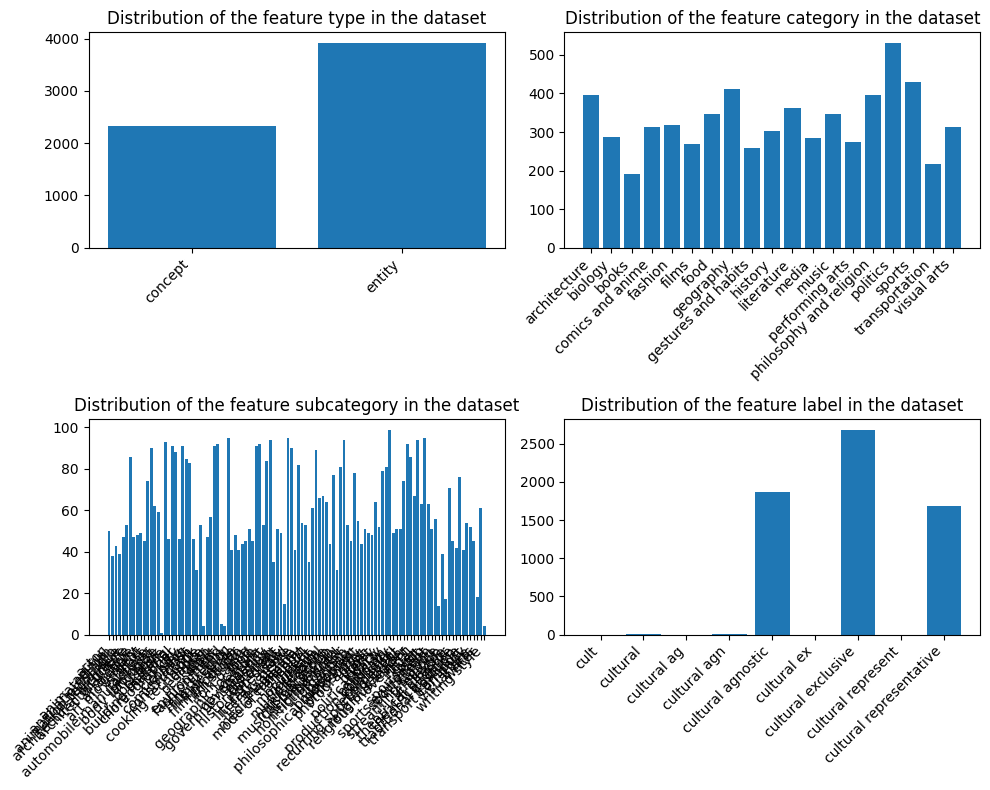

In [6]:
var_to_group_and_count=['type', 'category', 'subcategory', 'label']
i = 1

plt.figure(figsize=(10, 8))

for var in var_to_group_and_count:

  plt.subplot(2,2,i)
  groups = train_df.groupby(by=var, axis=0).count()['item']
  plt.xticks(rotation = 45, ha = 'right')
  plt.bar(x=groups.index, height=groups.values)
  plt.title(label = 'Distribution of the feature ' + var + ' in the dataset')
  plt.tight_layout()
  i = i+1

In [18]:
train_df.groupby(by=['category','label'], axis=0).count()['item']

category        label                  
architecture    cult                         1
                cultural agnostic          163
                cultural exclusive         173
                cultural representative     58
biology         cultural                     1
                                          ... 
transportation  cultural exclusive         106
                cultural representative     29
visual arts     cultural agnostic           69
                cultural exclusive         100
                cultural representative    143
Name: item, Length: 69, dtype: int64

In [58]:
category_label_counts = train_df.groupby(by=['category', 'label'], axis=0).count()['item'].to_dict()
category_label_counts

{('architecture', 'cult'): 1,
 ('architecture', 'cultural agnostic'): 163,
 ('architecture', 'cultural exclusive'): 173,
 ('architecture', 'cultural representative'): 58,
 ('biology', 'cultural'): 1,
 ('biology', 'cultural ag'): 1,
 ('biology', 'cultural agnostic'): 224,
 ('biology', 'cultural exclusive'): 49,
 ('biology', 'cultural representative'): 11,
 ('books', 'cultural agn'): 1,
 ('books', 'cultural agnostic'): 40,
 ('books', 'cultural exclusive'): 143,
 ('books', 'cultural representative'): 7,
 ('comics and anime', 'cultural'): 1,
 ('comics and anime', 'cultural agnostic'): 79,
 ('comics and anime', 'cultural exclusive'): 54,
 ('comics and anime', 'cultural represent'): 1,
 ('comics and anime', 'cultural representative'): 177,
 ('fashion', 'cultural agnostic'): 103,
 ('fashion', 'cultural exclusive'): 84,
 ('fashion', 'cultural representative'): 132,
 ('films', 'cultural agnostic'): 81,
 ('films', 'cultural exclusive'): 60,
 ('films', 'cultural representative'): 128,
 ('food', '

In [59]:
df_test = pd.DataFrame([
    {'category': cat, 'label': label, 'count': count}
    for (cat, label), count in category_label_counts.items()
])

df_test

,category,label,count
0,architecture,cult,1
1,architecture,cultural agnostic,163
2,architecture,cultural exclusive,173
3,architecture,cultural representative,58
4,biology,cultural,1
...,...,...,...
64,transportation,cultural exclusive,106
65,transportation,cultural representative,29
66,visual arts,cultural agnostic,69
67,visual arts,cultural exclusive,100


In [43]:
df_pivot = df_test.pivot(index='category', columns='label', values='count')
df_pivot

label,cult,cultural,cultural ag,cultural agn,cultural agnostic,cultural ex,cultural exclusive,cultural represent,cultural representative
category,,,,,,,,,
architecture,1.0,NaN,NaN,NaN,163.0,NaN,173.0,NaN,58.0
biology,NaN,1.0,1.0,NaN,224.0,NaN,49.0,NaN,11.0
books,NaN,NaN,NaN,1.0,40.0,NaN,143.0,NaN,7.0
comics and anime,NaN,1.0,NaN,NaN,79.0,NaN,54.0,1.0,177.0
fashion,NaN,NaN,NaN,NaN,103.0,NaN,84.0,NaN,132.0
films,NaN,NaN,NaN,NaN,81.0,NaN,60.0,NaN,128.0
food,NaN,1.0,NaN,NaN,75.0,NaN,115.0,NaN,155.0
geography,NaN,1.0,NaN,1.0,132.0,NaN,264.0,NaN,11.0
gestures and habits,NaN,NaN,NaN,NaN,86.0,NaN,119.0,NaN,54.0


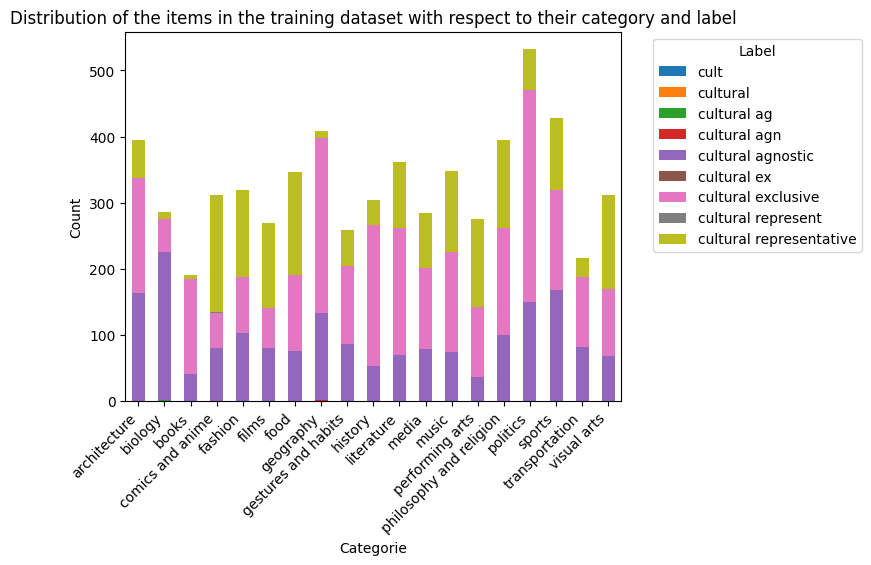

In [57]:
ax = df_pivot.plot(kind='bar', stacked=True, legend=False)
plt.title('Distribution of the items in the training dataset with respect to their category and label')
plt.xlabel('Categorie')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

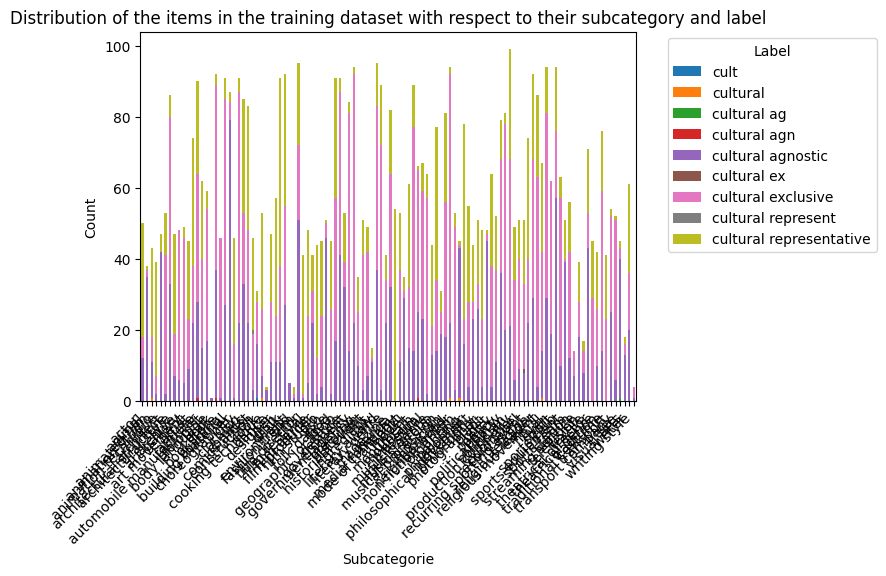

In [61]:
subcategory_label_counts = train_df.groupby(by=['subcategory', 'label'], axis=0).count()['item'].to_dict()

df_test = pd.DataFrame([
    {'subcategory': cat, 'label': label, 'count': count}
    for (cat, label), count in subcategory_label_counts.items()
])


df_pivot = df_test.pivot(index='subcategory', columns='label', values='count')
df_pivot


ax = df_pivot.plot(kind='bar', stacked=True, legend=False)
plt.title('Distribution of the items in the training dataset with respect to their subcategory and label')
plt.xlabel('Subcategorie')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

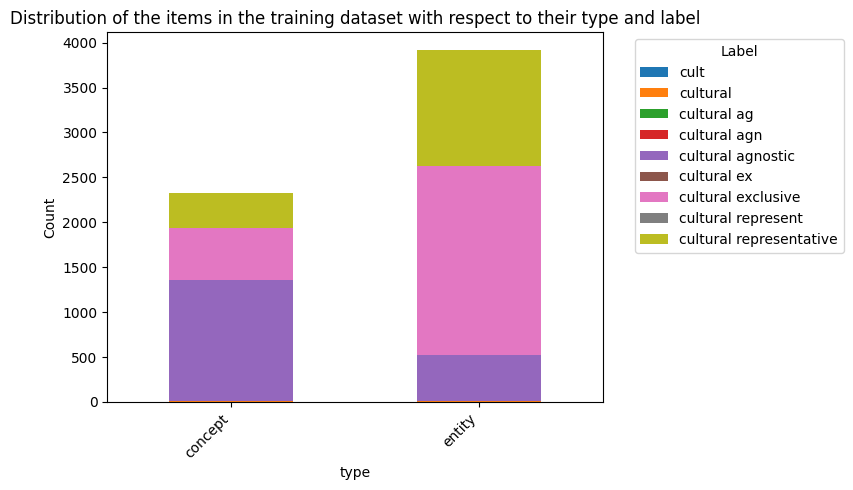

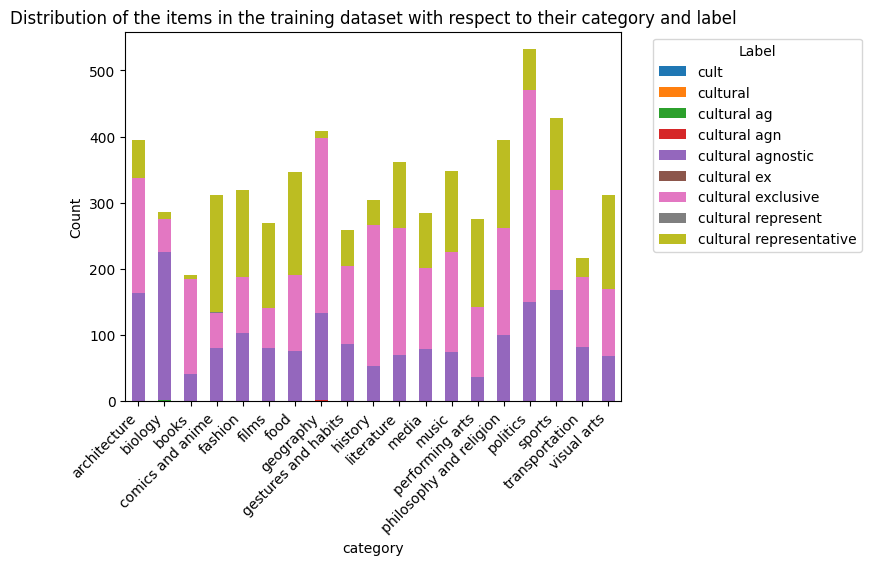

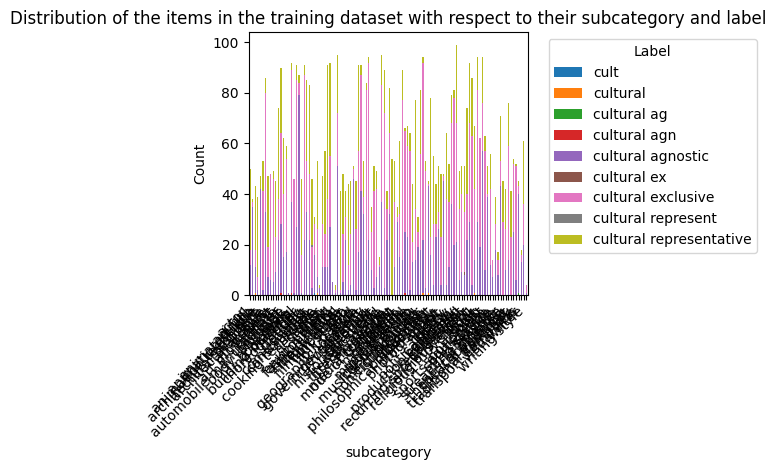

In [91]:
def plot_var_label_count(df, vars=['type', 'category', 'subcategory']):

  for var in vars :
    var_label_counts = df.groupby(by=[var, 'label'], axis=0).count()['item'].to_dict()

    df_test = pd.DataFrame([
      {var: var_bis, 'label': label, 'count': count}
      for (var_bis, label), count in var_label_counts.items()
    ])


    df_pivot = df_test.pivot(index=var, columns='label', values='count')
    ax = df_pivot.plot(kind='bar', stacked=True, legend=False)
    plt.title('Distribution of the items in the training dataset with respect to their ' + var + ' and label')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')

  plt.tight_layout()
  plt.show()

plot_var_label_count(df=train_df)

In [108]:
# Correlation

corr = train_df['type','category','subcategory','label'].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


KeyError: ('type', 'category', 'subcategory', 'label')